**More formal: Stability and accuracy.**

Recall that we defined the difference between the exact and approximate solution is the error. Like $y(t)$ it is a function that is in principle continuous,
\begin{equation}
\epsilon(t) \equiv y(t) - \overline{y}(t).
\end{equation}

Linearizing as before, the error obeys the *linear differential equation*

$$
\frac{d\epsilon}{dt} = J_n \epsilon.
$$
or, letting $z = J_n t$,
$$
\frac{d\epsilon(z)}{dz} = \epsilon(z).
$$

An integrator for $y$ also maps the error from $\epsilon_n \rightarrow \epsilon_{n+1}$,
\begin{equation}
\epsilon_{n+1} = R(z) \epsilon_{n}.
\end{equation}

An integrator may be unstable, conditionally stable, A-stable or L-stable.

Of these, A-stability and L-stability are important and distinct types of stability.

**A stability**:

An integrator is A-stable if
\begin{equation}
\boxed{|R(z)|<1 \: \forall Re(z) < 0.}
\end{equation}

This just means that if the differential equation is supposed to decay to zero $(z < 0)$, its numerical approximation does not grow without bound.

**L stability**

If an integrator is A-stable, it may also be L-stable if 
\begin{equation}
\boxed{\lim_{z\rightarrow \infty}R(z) = 0}
\end{equation}

L stability means that the integrator is stable for arbitrarily large time steps. This is a very important feature when we discuss solutions to stiff differential equations.

**Exercise:** Show that the forward Euler method is neither A- nor L-stable. but that the backward Euler method is L-stable. 

**Accuracy**

Just because a method is stable doesn't mean that it is *accurate*. It may well converge to the wrong answer or to a poor apprxoimation to the problem at hand.

Indeed, just because a method is unstable *does not mean* that it cannot be accurate.

Often, we can't know what the true form of $\epsilon(t)$ is, but we can bound it based on Lagrange's estimate, also known as the Taylor Remainder theorem. Consider the Taylor series of order $k$ a function that is analytic about a point $t_n$, 
\begin{equation}
y(t) = \sum_{l=0}^k c_l (t - t_n)^l + \epsilon(t).
\end{equation}
Simply differentiate to find the expansion coefficients, $c_l$
\begin{equation}
c_l = \frac{1}{l!}y^{(l)}(t_n),
\end{equation}
where $y^{(l)}$ is the $l^{th}$ time derivative of $y$ with respect to $t$.

The Remainder theorem says that the error $\epsilon(t)$ about $t = t_n$ has, as its lowest order polynomial, a function that grows as $(t - t_n)^{k+1}$. We usually write that using the big-O notation, 
\begin{equation}
\epsilon(t) = {\cal O}((t - t_n)^{k+1}),
\end{equation}

Giving the familar form 
\begin{equation}
y(t) = \sum_{l=0}^k \frac{1}{l!} y^{(l)}(t_n)(t - t_n)^l + {\cal O}((t - t_n)^{k+1})
\end{equation}

**Higher order methods:**

If we want more accurate methods, we have to do more work.

Consider the Taylor expansion of $y$ about $t$ for $h>0$,

\begin{equation}
y(t +h) = y(t) + y'(t)h + \frac{y''(t)}{2}h^2 + {\cal O}(h^3)
\end{equation}

But there is also an expansion in the negative direction,

\begin{equation}
y(t - h) = y(t) - y'(t)h + \frac{y''(t)}{2}h^2 + {\cal O}(h^3)
\end{equation}

Subtracting the two equations gives
\begin{equation}
y(t+h) - y(t-h) = 2 y'(t) h + {\cal O}(h^3)
\end{equation}

Since $y'(t) = f(y,t)$, we have a formula
\begin{equation}
y(t+h) = y(t-h) + 2f( y(t),t )h + {\cal O}(h^3)
\end{equation}

Setting $h\rightarrow h/2$ and shifting $t\rightarrow t+h/2$,
\begin{equation}
y(t+h) = y(t) + f( y(t+h/2),t+h/2)h + {\cal O}(h^3)
\end{equation}

To maintain accuracy to order $h^2$, we have to compute $y(t+h/2)$ to order $h$, $f(y(t+h/2),t+h/2) = f( y(t) + f(y(t),t)h/2,t+h/2 ) + {\cal O}(h^2)$.

Putting it all together, we've got an expression accurate to $h^2$-which is to say that the error is a polynomial of order ${\cal O}(h^3)$. It goes in two steps,
$$
y_n^* =  \overline{y}_n + f(\overline{y}_n,t_n)h/2
$$
$$
\overline{y}_{n+1} = \overline{y}_n + hf(y_n^*,t_n + h/2)
$$

This is a two-step second-order accurate method. While the accuracy is greater, the penalty (there's always a price) is that you need two evaluations of $f(y,t)$ to take one step.

*Weighing computational expense*
We've seen that the explicit Euler is conditionally stable and is only order 1 accurate. On the other hand, you're only evaluating the function $f(y,t)$ once to take a step. Often, the evaluation of the function is the most expensive part of the computation. So, is it better to take super small time steps so that the method is stable, or to take larger time steps and use a higher order integrator?

These kinds of strategic decisions are commonplace in numerical work. In the case of differential equations, various types of solution schemes can provide important checks to make sure that not only is your solution converging, but that is converging to the right answer.

A critical part of the Chapman cycle involves the Lindemann-Hinschelwood mechanism,

$$
O\cdot + O_2 + M \rightarrow O_3 + M
$$

The law of mass action for ozone says
\begin{equation}
\frac{d[O_3]}{dt} = k[O\cdot][O_2][M].
\end{equation}

where $M$ is a buffer gas, usually nitrogen, that absorbs the excess energy of the reaction and stabilizes ozone. Near the bifurcation regime, the partial pressure of ozone obeys an effective rate equation,

$$
\frac{d[O_3]}{dt} = -\gamma[O_3] + \alpha [O_3]^2
$$.

Measuring time in units of $\gamma^{-1}$ and concentration in terms of the inital partial pressure of $[O_3]$, we have a differential equation
$$
\frac{dy}{dt} = -y + \beta y^2.
$$

where $\beta = \alpha[O_3(0)]/\gamma$ and $y(t) = [O_3(t)]/[O_3(0)]$.

Let's use this equation to test the accuracy of the second-order method compared to forward Euler. We'll try to find the bifurcation threshold using both of them.

In [1]:
using Pkg
using UnPack
using Plots
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/github/CHEM-5555/Numerical Solutions to Differential Equations`


In [2]:
include("JDE_ODE_Base.jl")
using .JDE_ODE_Base
import .JDE_ODE_Base: step

Define the integrators.

In [3]:
struct ForwardEuler <: ODEIntegrator end
function step(problem::ODEProblem, ::ForwardEuler, yₙ::Float64, tₙ::Float64)
    @unpack f, h = problem
    return yₙ + h*f(yₙ,tₙ)
end

struct Midpoint <: ODEIntegrator end
function step(problem::ODEProblem, ::Midpoint, yₙ::Float64, tₙ::Float64)
    @unpack f, h = problem
    k₁ = f(yₙ, tₙ)
    k₂ = f(yₙ + h/2*k₁, tₙ + h/2)
    return yₙ + h*k₂
end

step (generic function with 2 methods)

Now let's run a solution for the Ozone problem using some of our integrators. We'll try to find the bifurcation threshold. It'll be helpful to define a function to assist.

The differential equation to solve is

\begin{equation}
\frac{dy}{dt} = -y + \beta y^2
\end{equation}

for $y_0$ = 1.0 and $\beta$ variable.

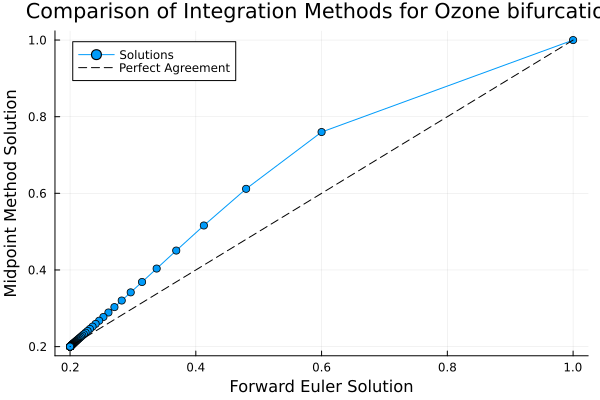

In [28]:
function solve_ozone(β::Float64,T::Float64,h::Float64,integrator::ODEIntegrator)
    y₀ = 1.0
    f(y,t) = y - β*y^2
    problem = ODEProblem(f, y₀, T, h)
    return solve(problem, integrator)
end

function compare_solutions(β::Float64,T::Float64,h::Float64)
    solution1 = solve_ozone(β,T,h,ForwardEuler())
    solution2 = solve_ozone(β,T,h,Midpoint())
    return solution1, solution2
end

#Try a value of h and β.

h = 0.1
β = 5.0
forward, midpoint = compare_solutions(β, 10.0, h)
plot(forward.y, midpoint.y, 
    marker=:circle,
    xlabel="Forward Euler Solution",
    ylabel="Midpoint Method Solution",
    title="Comparison of Integration Methods for Ozone bifurcation",
    label="Solutions")

plot!(forward.y,forward.y, 
    linestyle=:dash, 
    color=:black,
    label="Perfect Agreement")

Even at a relatively small timestep, the disagreement between the methods: one first-order another second order accurate, but both explicit one-step methods, is substantial!